In [80]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [81]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot = True)
x_train = mnist.train.images
y_train = mnist.train.labels
x_test = mnist.test.images
y_test = mnist.test.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [82]:
class layer:
    def __init__(self, inputs, in_size, out_size, activation_function=None):
#         self.W = tf.Variable(tf.zeros([in_size, out_size]))
        self.W = tf.Variable(tf.random_normal([in_size, out_size]))
        self.b = tf.Variable(tf.constant(0.1, shape=[1,out_size]))
#         self.b = tf.Variable(tf.random_normal([1,out_size]))
        self.Wx_plus_b = tf.matmul(inputs, self.W) + self.b
#         self.activation_function = activation_function
    def output(self, activation_function=None):
        if activation_function == None:
            result = self.Wx_plus_b
        else :
            result = activation_function(self.Wx_plus_b)
        return result

In [83]:
xs = tf.placeholder(tf.float32, [None, 784])    #shape=(100,784)
ys = tf.placeholder(tf.float32, [None, 10])    #shape=(100,10)


# layer1 = layer(xs, 784, 512)
layer1 = layer(xs, 784, 256)
# layer2 = layer(layer1.output(tf.nn.sigmoid), 512, 256)
# layer2 = layer(layer1.output(tf.nn.sigmoid), 256, 256)
# layer3 = layer(layer2.output(tf.nn.sigmoid), 256, 128)
layer3 = layer(layer1.output(tf.nn.sigmoid), 256, 50)
# layer4 = layer(layer3.output(tf.nn.sigmoid), 128, 64)
# layer5 = layer(layer4.output(tf.nn.sigmoid), 64, 32)
# layer6 = layer(layer5.output(tf.nn.sigmoid), 32, 16)
# layer7 = layer(layer6.output(tf.nn.sigmoid), 16, 8)
# layer8 = layer(layer7.output(tf.nn.sigmoid), 8, 4)
layer8 = layer(layer3.output(tf.nn.sigmoid), 50, 10)
# layer9 = layer(layer8.output(tf.nn.sigmoid), 4, 2)
layer9 = layer(layer8.output(tf.nn.sigmoid), 10, 2)
# layer10 = layer(layer9.output(tf.nn.sigmoid), 2, 4)
layer10 = layer(layer9.output(tf.nn.sigmoid), 2, 10)
# layer11 = layer(layer10.output(tf.nn.sigmoid), 4, 8)
layer11 = layer(layer10.output(tf.nn.sigmoid), 10, 50)
# layer12 = layer(layer11.output(tf.nn.sigmoid), 8, 16)
# layer13 = layer(layer12.output(tf.nn.sigmoid), 16, 32)
# layer14 = layer(layer13.output(tf.nn.sigmoid), 32, 64)
# layer15 = layer(layer14.output(tf.nn.sigmoid), 64, 128)
# layer16 = layer(layer15.output(tf.nn.sigmoid), 128, 256)
layer16 = layer(layer11.output(tf.nn.sigmoid), 50, 256)
# layer17 = layer(layer16.output(tf.nn.sigmoid), 256, 512)
# layer17 = layer(layer16.output(tf.nn.sigmoid), 256, 512)
# layer18 = layer(layer17.output(tf.nn.sigmoid), 512, 784)
layer18 = layer(layer16.output(tf.nn.sigmoid), 256, 784)




# layer1 = layer(xs, 784, 100)
# layer2 = layer(layer1.output(tf.nn.relu), 100, 10)
# layer3 = layer(layer2.output(tf.nn.relu), 10, 2)
# layer4 = layer(layer3.output(tf.nn.relu), 2, 10)
# layer5 = layer(layer4.output(tf.nn.relu), 10, 100)
# layer6 = layer(layer5.output(tf.nn.relu), 100, 784)


# layer_pre1 = layer(layer1.output(tf.nn.relu), 100, 784)
# layer_pre2 = layer(layer2.output(tf.nn.relu), 10, 100)


# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer18.output(tf.nn.sigmoid)))
# loss_ae = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer6.output(tf.nn.relu)))
# loss_ae_pre1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.relu)))
# loss_ae_pre1 = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(labels=xs, logits=layer10.output(tf.nn.relu)))
loss_ae = tf.reduce_mean(tf.pow(xs - layer18.output(tf.nn.relu), 2))

# loss_ae = tf.reduce_mean(tf.square(xs-layer10.output(tf.nn.relu)))
# train_step_ae = tf.train.GradientDescentOptimizer(0.5).minimize(loss_ae)
# train_step_ae = tf.train.RMSPropOptimizer(0.05).minimize(loss_ae)
# train_step_ae = tf.train.MomentumOptimizer(0.3,0.1).minimize(loss_ae)
train_step_ae = tf.train.AdamOptimizer(0.0002).minimize(loss_ae)


# correct_prediction = tf.equal(tf.argmax(layer3,1), tf.argmax(ys,1))
# accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [84]:
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)

batch_size = 100
batches = x_train.shape[0]//batch_size
index = np.arange(x_train.shape[0])

epoch:  0  , loss:  0.487978
epoch:  5  , loss:  0.0930783
epoch:  10  , loss:  0.0931528
epoch:  15  , loss:  0.0932096
epoch:  20  , loss:  0.0923371
epoch:  25  , loss:  0.090967
epoch:  30  , loss:  0.0894736
[[  3.05996180e-01   3.04196710e-05   4.27015424e-01 ...,   1.83064014e-06
    3.52124013e-02   3.76727313e-01]
 [  2.85987616e-01   3.58201505e-05   3.98632318e-01 ...,   1.78381345e-06
    3.70734856e-02   3.62081409e-01]
 [  3.21047902e-01   2.68273452e-05   4.48557377e-01 ...,   1.79826338e-06
    3.33824866e-02   3.73608917e-01]
 [  2.86178052e-01   3.65537198e-05   3.96746188e-01 ...,   1.91070285e-06
    3.80181670e-02   3.88111442e-01]]


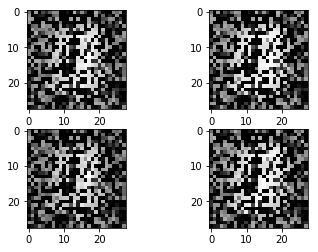

In [85]:
#Autoencoder
for epoch in range(31):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})

    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

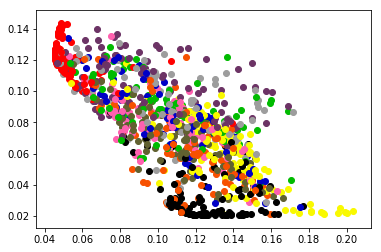

In [87]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0892568
epoch:  5  , loss:  0.0880608
epoch:  10  , loss:  0.086979
epoch:  15  , loss:  0.0863856
epoch:  20  , loss:  0.0859601
epoch:  25  , loss:  0.0856701
epoch:  30  , loss:  0.0853737
epoch:  35  , loss:  0.0849481
epoch:  40  , loss:  0.0847142
epoch:  45  , loss:  0.0845046
epoch:  50  , loss:  0.0843843
epoch:  55  , loss:  0.0842632
epoch:  60  , loss:  0.0839636
epoch:  65  , loss:  0.0835597
epoch:  70  , loss:  0.0834073
epoch:  75  , loss:  0.0832836
epoch:  80  , loss:  0.0831994
epoch:  85  , loss:  0.0830441
epoch:  90  , loss:  0.0827745
epoch:  95  , loss:  0.0826703
epoch:  100  , loss:  0.0825743
[[  3.89372334e-02   7.31436103e-06   2.92758457e-02 ...,   6.98800591e-07
    1.02537565e-01   2.14346364e-01]
 [  4.00270075e-02   6.44053625e-06   3.32640819e-02 ...,   8.22729703e-07
    1.45384237e-01   2.24299803e-01]
 [  5.54278381e-02   3.86878037e-06   6.03357106e-02 ...,   1.11026282e-06
    4.24696989e-02   2.56324261e-01]
 [  4.32385951e

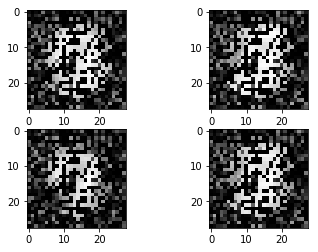

In [88]:
#Autoencoder
for epoch in range(101):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=2, ncols=2)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*2+j], cmap='gray')

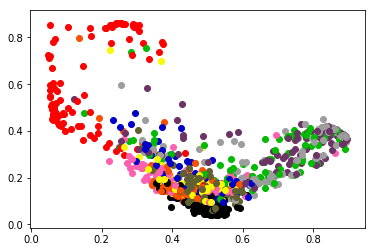

In [89]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0825551
epoch:  5  , loss:  0.0824565
epoch:  10  , loss:  0.0823258
epoch:  15  , loss:  0.0819795
epoch:  20  , loss:  0.0818389
epoch:  25  , loss:  0.0815343
epoch:  30  , loss:  0.0811701
epoch:  35  , loss:  0.0810527
epoch:  40  , loss:  0.0807852
epoch:  45  , loss:  0.080689
epoch:  50  , loss:  0.0806087
epoch:  55  , loss:  0.0805389
epoch:  60  , loss:  0.0804776
epoch:  65  , loss:  0.0804179
epoch:  70  , loss:  0.0803635
epoch:  75  , loss:  0.0803109
epoch:  80  , loss:  0.0802618
epoch:  85  , loss:  0.0802136
epoch:  90  , loss:  0.080167
epoch:  95  , loss:  0.0801215
epoch:  100  , loss:  0.0798517
epoch:  105  , loss:  0.0798081
epoch:  110  , loss:  0.079719
epoch:  115  , loss:  0.0796376
epoch:  120  , loss:  0.0793028
epoch:  125  , loss:  0.0792449
epoch:  130  , loss:  0.0791988
epoch:  135  , loss:  0.0791578
epoch:  140  , loss:  0.0791159
epoch:  145  , loss:  0.0790564
epoch:  150  , loss:  0.0790188
epoch:  155  , loss:  0.078949
ep

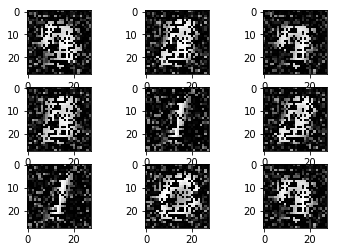

In [90]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

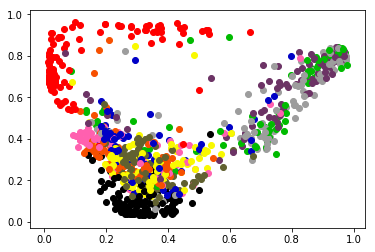

In [91]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0765041
epoch:  5  , loss:  0.0764515
epoch:  10  , loss:  0.0762288
epoch:  15  , loss:  0.0761928
epoch:  20  , loss:  0.0761682
epoch:  25  , loss:  0.0761463
epoch:  30  , loss:  0.0761226
epoch:  35  , loss:  0.076103
epoch:  40  , loss:  0.07608
epoch:  45  , loss:  0.0760616
epoch:  50  , loss:  0.076039
epoch:  55  , loss:  0.0760049
epoch:  60  , loss:  0.0759853
epoch:  65  , loss:  0.0759674
epoch:  70  , loss:  0.0759482
epoch:  75  , loss:  0.0759285
epoch:  80  , loss:  0.0759103
epoch:  85  , loss:  0.0758901
epoch:  90  , loss:  0.0758715
epoch:  95  , loss:  0.075853
epoch:  100  , loss:  0.0758325
epoch:  105  , loss:  0.0758137
epoch:  110  , loss:  0.0756698
epoch:  115  , loss:  0.0756394
epoch:  120  , loss:  0.0755057
epoch:  125  , loss:  0.0754189
epoch:  130  , loss:  0.0753676
epoch:  135  , loss:  0.0750708
epoch:  140  , loss:  0.0750438
epoch:  145  , loss:  0.0750184
epoch:  150  , loss:  0.0749979
epoch:  155  , loss:  0.0749706
epo

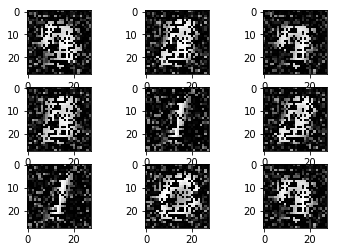

In [92]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

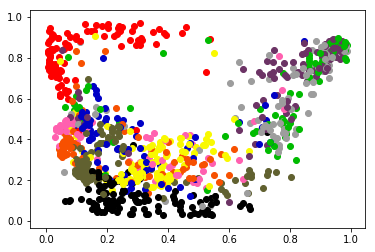

In [93]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0739902
epoch:  5  , loss:  0.0739242
epoch:  10  , loss:  0.0737258
epoch:  15  , loss:  0.073686
epoch:  20  , loss:  0.0736446
epoch:  25  , loss:  0.0736103
epoch:  30  , loss:  0.0735717
epoch:  35  , loss:  0.0735176
epoch:  40  , loss:  0.0734799
epoch:  45  , loss:  0.073452
epoch:  50  , loss:  0.0734225
epoch:  55  , loss:  0.0733924
epoch:  60  , loss:  0.0733661
epoch:  65  , loss:  0.0733396
epoch:  70  , loss:  0.07331
epoch:  75  , loss:  0.0732878
epoch:  80  , loss:  0.0732623
epoch:  85  , loss:  0.0732376
epoch:  90  , loss:  0.073081
epoch:  95  , loss:  0.0730495
epoch:  100  , loss:  0.0730183
epoch:  105  , loss:  0.0729857
epoch:  110  , loss:  0.0729588
epoch:  115  , loss:  0.0729069
epoch:  120  , loss:  0.0728855
epoch:  125  , loss:  0.0728615
epoch:  130  , loss:  0.0728388
epoch:  135  , loss:  0.0728213
epoch:  140  , loss:  0.0727526
epoch:  145  , loss:  0.072727
epoch:  150  , loss:  0.0727102
epoch:  155  , loss:  0.0726928
epoc

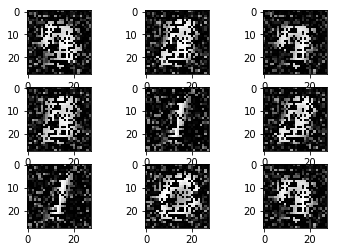

In [94]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

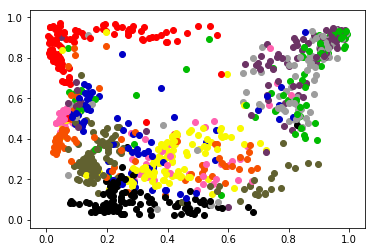

In [95]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0718334
epoch:  5  , loss:  0.0718201
epoch:  10  , loss:  0.0718054
epoch:  15  , loss:  0.0717954
epoch:  20  , loss:  0.0717826
epoch:  25  , loss:  0.071773
epoch:  30  , loss:  0.0717582
epoch:  35  , loss:  0.0717535
epoch:  40  , loss:  0.0717385
epoch:  45  , loss:  0.0717242
epoch:  50  , loss:  0.0717125
epoch:  55  , loss:  0.0716899
epoch:  60  , loss:  0.0716827
epoch:  65  , loss:  0.0716663
epoch:  70  , loss:  0.0716516
epoch:  75  , loss:  0.0716425
epoch:  80  , loss:  0.0716301
epoch:  85  , loss:  0.0716169
epoch:  90  , loss:  0.0716062
epoch:  95  , loss:  0.0715947
epoch:  100  , loss:  0.0715858
epoch:  105  , loss:  0.0715762
epoch:  110  , loss:  0.0715578
epoch:  115  , loss:  0.0715505
epoch:  120  , loss:  0.0715342
epoch:  125  , loss:  0.0715273
epoch:  130  , loss:  0.0715172
epoch:  135  , loss:  0.0715064
epoch:  140  , loss:  0.071491
epoch:  145  , loss:  0.0714937
epoch:  150  , loss:  0.0714688
epoch:  155  , loss:  0.0714641


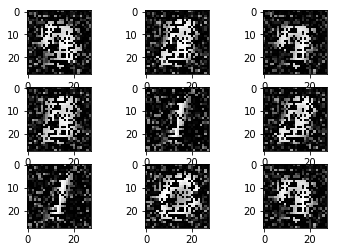

In [96]:
#Autoencoder
for epoch in range(301):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

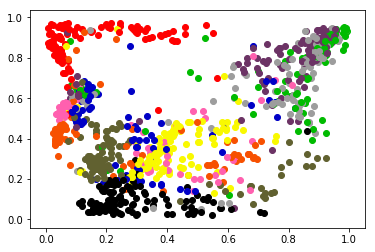

In [97]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0711492
epoch:  5  , loss:  0.0711429
epoch:  10  , loss:  0.071127
epoch:  15  , loss:  0.0711218
epoch:  20  , loss:  0.0711052
epoch:  25  , loss:  0.0710997
epoch:  30  , loss:  0.0710826
epoch:  35  , loss:  0.0710753
epoch:  40  , loss:  0.0710695
epoch:  45  , loss:  0.0710581
epoch:  50  , loss:  0.0710447
epoch:  55  , loss:  0.0710336
epoch:  60  , loss:  0.0710265
epoch:  65  , loss:  0.0710157
epoch:  70  , loss:  0.0709947
epoch:  75  , loss:  0.070986
epoch:  80  , loss:  0.0709755
epoch:  85  , loss:  0.0709635
epoch:  90  , loss:  0.070952
epoch:  95  , loss:  0.0709468
epoch:  100  , loss:  0.0709354
epoch:  105  , loss:  0.0709227
epoch:  110  , loss:  0.0709137
epoch:  115  , loss:  0.0709012
epoch:  120  , loss:  0.0708855
epoch:  125  , loss:  0.0708799
epoch:  130  , loss:  0.0708654
epoch:  135  , loss:  0.0708517
epoch:  140  , loss:  0.0708244
epoch:  145  , loss:  0.0707428
epoch:  150  , loss:  0.0706747
epoch:  155  , loss:  0.0706618
e

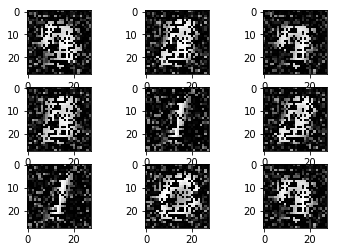

In [98]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

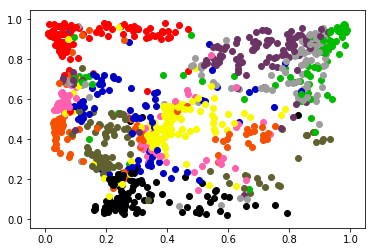

In [99]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0680677
epoch:  5  , loss:  0.0680442
epoch:  10  , loss:  0.0680621
epoch:  15  , loss:  0.0680557
epoch:  20  , loss:  0.0680209
epoch:  25  , loss:  0.0680119
epoch:  30  , loss:  0.0679412
epoch:  35  , loss:  0.0679004
epoch:  40  , loss:  0.0678635
epoch:  45  , loss:  0.0678519
epoch:  50  , loss:  0.0678418
epoch:  55  , loss:  0.0678409
epoch:  60  , loss:  0.0678527
epoch:  65  , loss:  0.0678116
epoch:  70  , loss:  0.0678067
epoch:  75  , loss:  0.0678066
epoch:  80  , loss:  0.0678332
epoch:  85  , loss:  0.0677919
epoch:  90  , loss:  0.0677819
epoch:  95  , loss:  0.067778
epoch:  100  , loss:  0.0677717
epoch:  105  , loss:  0.0677532
epoch:  110  , loss:  0.06776
epoch:  115  , loss:  0.0677627
epoch:  120  , loss:  0.0677392
epoch:  125  , loss:  0.0677493
epoch:  130  , loss:  0.0677222
epoch:  135  , loss:  0.0677208
epoch:  140  , loss:  0.0677088
epoch:  145  , loss:  0.0676973
epoch:  150  , loss:  0.0676908
epoch:  155  , loss:  0.0676562
e

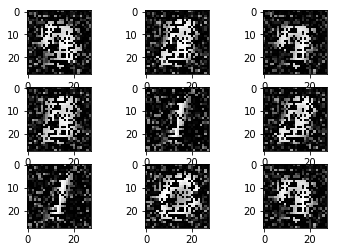

In [100]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

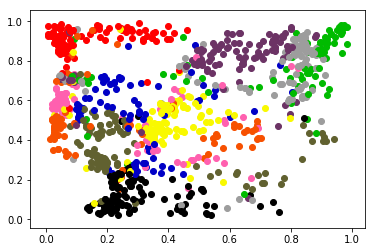

In [101]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0659418
epoch:  5  , loss:  0.0659273
epoch:  10  , loss:  0.0659295
epoch:  15  , loss:  0.0659247
epoch:  20  , loss:  0.0659055
epoch:  25  , loss:  0.0658991
epoch:  30  , loss:  0.0658921
epoch:  35  , loss:  0.0658971
epoch:  40  , loss:  0.0658789
epoch:  45  , loss:  0.0659056
epoch:  50  , loss:  0.0658831
epoch:  55  , loss:  0.0658796
epoch:  60  , loss:  0.0658906
epoch:  65  , loss:  0.0658636
epoch:  70  , loss:  0.0658446
epoch:  75  , loss:  0.0657931
epoch:  80  , loss:  0.0657621
epoch:  85  , loss:  0.06571
epoch:  90  , loss:  0.0656623
epoch:  95  , loss:  0.0656039
epoch:  100  , loss:  0.0655398
epoch:  105  , loss:  0.0655005
epoch:  110  , loss:  0.0654937
epoch:  115  , loss:  0.0654838
epoch:  120  , loss:  0.0654437
epoch:  125  , loss:  0.0654013
epoch:  130  , loss:  0.065151
epoch:  135  , loss:  0.0650866
epoch:  140  , loss:  0.0650478
epoch:  145  , loss:  0.0650639
epoch:  150  , loss:  0.0650351
epoch:  155  , loss:  0.0650268
e

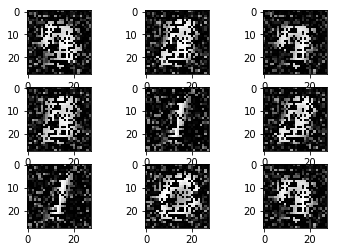

In [102]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

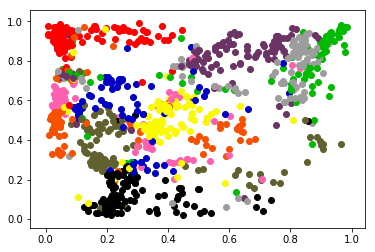

In [103]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0637806
epoch:  5  , loss:  0.06378
epoch:  10  , loss:  0.0637949
epoch:  15  , loss:  0.0637699
epoch:  20  , loss:  0.0637801
epoch:  25  , loss:  0.0637415
epoch:  30  , loss:  0.0638494
epoch:  35  , loss:  0.0637706
epoch:  40  , loss:  0.0637483
epoch:  45  , loss:  0.0637546
epoch:  50  , loss:  0.0637491
epoch:  55  , loss:  0.063732
epoch:  60  , loss:  0.0637293
epoch:  65  , loss:  0.0637103
epoch:  70  , loss:  0.0637196
epoch:  75  , loss:  0.0637413
epoch:  80  , loss:  0.0637333
epoch:  85  , loss:  0.0637522
epoch:  90  , loss:  0.0637804
epoch:  95  , loss:  0.0636986
epoch:  100  , loss:  0.0637223
epoch:  105  , loss:  0.0637472
epoch:  110  , loss:  0.0636892
epoch:  115  , loss:  0.0636847
epoch:  120  , loss:  0.0637575
epoch:  125  , loss:  0.0637394
epoch:  130  , loss:  0.0637152
epoch:  135  , loss:  0.0637107
epoch:  140  , loss:  0.0636956
epoch:  145  , loss:  0.0637376
epoch:  150  , loss:  0.0636721
epoch:  155  , loss:  0.0637002
e

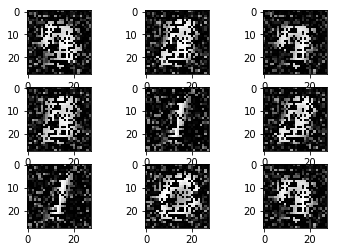

In [104]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

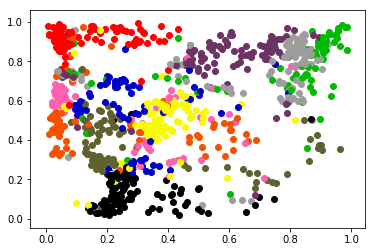

In [105]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0630221
epoch:  5  , loss:  0.0630306
epoch:  10  , loss:  0.0630839
epoch:  15  , loss:  0.062926
epoch:  20  , loss:  0.0629928
epoch:  25  , loss:  0.0631092
epoch:  30  , loss:  0.0630733
epoch:  35  , loss:  0.0631736
epoch:  40  , loss:  0.062913
epoch:  45  , loss:  0.0628884
epoch:  50  , loss:  0.0629119
epoch:  55  , loss:  0.0629493
epoch:  60  , loss:  0.0630638
epoch:  65  , loss:  0.0630065
epoch:  70  , loss:  0.0628944
epoch:  75  , loss:  0.0628836
epoch:  80  , loss:  0.0629451
epoch:  85  , loss:  0.0630643
epoch:  90  , loss:  0.0628828
epoch:  95  , loss:  0.0628269
epoch:  100  , loss:  0.062794
epoch:  105  , loss:  0.0628376
epoch:  110  , loss:  0.0629849
epoch:  115  , loss:  0.0628387
epoch:  120  , loss:  0.0628414
epoch:  125  , loss:  0.0628687
epoch:  130  , loss:  0.0627569
epoch:  135  , loss:  0.0627929
epoch:  140  , loss:  0.0627669
epoch:  145  , loss:  0.0629352
epoch:  150  , loss:  0.0629518
epoch:  155  , loss:  0.0629609
e

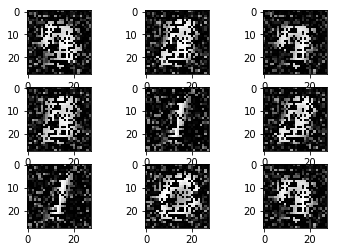

In [106]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

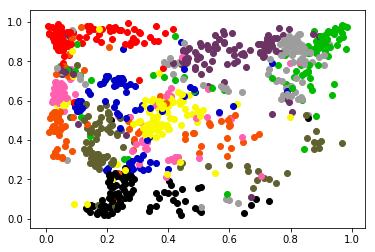

In [107]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0620678
epoch:  5  , loss:  0.0620075
epoch:  10  , loss:  0.0620505
epoch:  15  , loss:  0.062169
epoch:  20  , loss:  0.0622051
epoch:  25  , loss:  0.0620595
epoch:  30  , loss:  0.061995
epoch:  35  , loss:  0.0619923
epoch:  40  , loss:  0.0621275
epoch:  45  , loss:  0.0621628
epoch:  50  , loss:  0.0620611
epoch:  55  , loss:  0.0620295
epoch:  60  , loss:  0.0619767
epoch:  65  , loss:  0.0620325
epoch:  70  , loss:  0.0621964
epoch:  75  , loss:  0.0622408
epoch:  80  , loss:  0.0620002
epoch:  85  , loss:  0.0620567
epoch:  90  , loss:  0.0620958
epoch:  95  , loss:  0.0621108
epoch:  100  , loss:  0.0621477
epoch:  105  , loss:  0.061981
epoch:  110  , loss:  0.061984
epoch:  115  , loss:  0.0619518
epoch:  120  , loss:  0.0619502
epoch:  125  , loss:  0.0620377
epoch:  130  , loss:  0.062149
epoch:  135  , loss:  0.0620717
epoch:  140  , loss:  0.0619567
epoch:  145  , loss:  0.0619428
epoch:  150  , loss:  0.0619698
epoch:  155  , loss:  0.0621453
epo

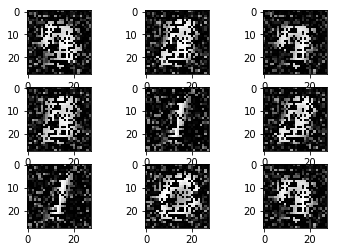

In [108]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

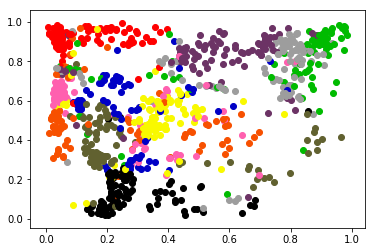

In [109]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0614471
epoch:  5  , loss:  0.0615166
epoch:  10  , loss:  0.0615024
epoch:  15  , loss:  0.0614855
epoch:  20  , loss:  0.0615017
epoch:  25  , loss:  0.0614757
epoch:  30  , loss:  0.0614798
epoch:  35  , loss:  0.0614758
epoch:  40  , loss:  0.0614592
epoch:  45  , loss:  0.0614733
epoch:  50  , loss:  0.0614617
epoch:  55  , loss:  0.0614932
epoch:  60  , loss:  0.0614161
epoch:  65  , loss:  0.0614023
epoch:  70  , loss:  0.0614355
epoch:  75  , loss:  0.0615044
epoch:  80  , loss:  0.0614913
epoch:  85  , loss:  0.0614245
epoch:  90  , loss:  0.0614326
epoch:  95  , loss:  0.0614706
epoch:  100  , loss:  0.0615356
epoch:  105  , loss:  0.0614483
epoch:  110  , loss:  0.0614674
epoch:  115  , loss:  0.0614499
epoch:  120  , loss:  0.0614504
epoch:  125  , loss:  0.0614266
epoch:  130  , loss:  0.0614513
epoch:  135  , loss:  0.0614954
epoch:  140  , loss:  0.0615853
epoch:  145  , loss:  0.0614645
epoch:  150  , loss:  0.0614091
epoch:  155  , loss:  0.061408

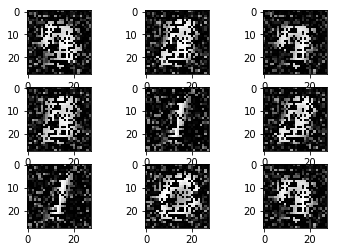

In [110]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

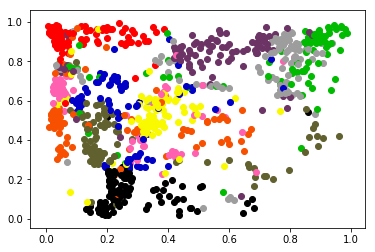

In [111]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0609919
epoch:  5  , loss:  0.0609703
epoch:  10  , loss:  0.060907
epoch:  15  , loss:  0.0608371
epoch:  20  , loss:  0.0608316
epoch:  25  , loss:  0.0609279
epoch:  30  , loss:  0.0609297
epoch:  35  , loss:  0.060817
epoch:  40  , loss:  0.0608507
epoch:  45  , loss:  0.0608623
epoch:  50  , loss:  0.0608362
epoch:  55  , loss:  0.0609151
epoch:  60  , loss:  0.0608981
epoch:  65  , loss:  0.0609841
epoch:  70  , loss:  0.0609188
epoch:  75  , loss:  0.0608897
epoch:  80  , loss:  0.0608166
epoch:  85  , loss:  0.0610002
epoch:  90  , loss:  0.0607915
epoch:  95  , loss:  0.060794
epoch:  100  , loss:  0.0608359
epoch:  105  , loss:  0.0608346
epoch:  110  , loss:  0.0609363
epoch:  115  , loss:  0.0609548
epoch:  120  , loss:  0.0609848
epoch:  125  , loss:  0.0609235
epoch:  130  , loss:  0.0608048
epoch:  135  , loss:  0.0607816
epoch:  140  , loss:  0.0607935
epoch:  145  , loss:  0.0607986
epoch:  150  , loss:  0.0610409
epoch:  155  , loss:  0.0608401
e

epoch:  1280  , loss:  0.0603522
epoch:  1285  , loss:  0.0604392
epoch:  1290  , loss:  0.0603148
epoch:  1295  , loss:  0.0603792
epoch:  1300  , loss:  0.0603858
epoch:  1305  , loss:  0.060369
epoch:  1310  , loss:  0.0604408
epoch:  1315  , loss:  0.0603766
epoch:  1320  , loss:  0.0603861
epoch:  1325  , loss:  0.060453
epoch:  1330  , loss:  0.060471
epoch:  1335  , loss:  0.0605325
epoch:  1340  , loss:  0.0603415
epoch:  1345  , loss:  0.0604517
epoch:  1350  , loss:  0.060313
epoch:  1355  , loss:  0.0603006
epoch:  1360  , loss:  0.0603106
epoch:  1365  , loss:  0.0603148
epoch:  1370  , loss:  0.0603942
epoch:  1375  , loss:  0.0603089
epoch:  1380  , loss:  0.0603501
epoch:  1385  , loss:  0.0603124
epoch:  1390  , loss:  0.0603006
epoch:  1395  , loss:  0.0603731
epoch:  1400  , loss:  0.0603059
epoch:  1405  , loss:  0.0603043
epoch:  1410  , loss:  0.0603045
epoch:  1415  , loss:  0.0603123
epoch:  1420  , loss:  0.0603225
epoch:  1425  , loss:  0.0603203
epoch:  1430  

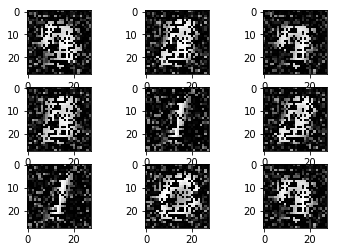

In [112]:
#Autoencoder
for epoch in range(2001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer10_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

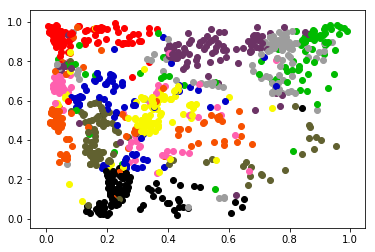

In [113]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0601085
epoch:  5  , loss:  0.0601396
epoch:  10  , loss:  0.0601591
epoch:  15  , loss:  0.0601524
epoch:  20  , loss:  0.0604298
epoch:  25  , loss:  0.0603483
epoch:  30  , loss:  0.0601751
epoch:  35  , loss:  0.0601178
epoch:  40  , loss:  0.0602556
epoch:  45  , loss:  0.0600833
epoch:  50  , loss:  0.0600703
epoch:  55  , loss:  0.0600856
epoch:  60  , loss:  0.0600791
epoch:  65  , loss:  0.0601358
epoch:  70  , loss:  0.0602108
epoch:  75  , loss:  0.0601044
epoch:  80  , loss:  0.060103
epoch:  85  , loss:  0.0601455
epoch:  90  , loss:  0.0600871
epoch:  95  , loss:  0.0601012
epoch:  100  , loss:  0.0601337
epoch:  105  , loss:  0.0600626
epoch:  110  , loss:  0.060131
epoch:  115  , loss:  0.0600761
epoch:  120  , loss:  0.06018
epoch:  125  , loss:  0.0601015
epoch:  130  , loss:  0.0600802
epoch:  135  , loss:  0.06013
epoch:  140  , loss:  0.0601074
epoch:  145  , loss:  0.0601089
epoch:  150  , loss:  0.0601375
epoch:  155  , loss:  0.0601182
epoc

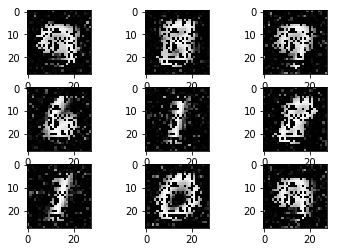

In [114]:
#Autoencoder
for epoch in range(501):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

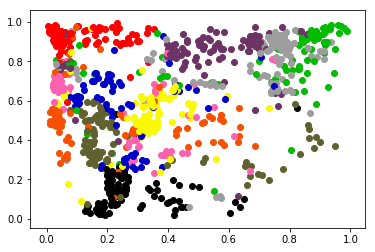

In [115]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0597855
epoch:  5  , loss:  0.0597831
epoch:  10  , loss:  0.0598015
epoch:  15  , loss:  0.0598351
epoch:  20  , loss:  0.0597986
epoch:  25  , loss:  0.0598035
epoch:  30  , loss:  0.0598085
epoch:  35  , loss:  0.0598499
epoch:  40  , loss:  0.0597769
epoch:  45  , loss:  0.0597535
epoch:  50  , loss:  0.0597869
epoch:  55  , loss:  0.0597591
epoch:  60  , loss:  0.0597842
epoch:  65  , loss:  0.0597867
epoch:  70  , loss:  0.0599801
epoch:  75  , loss:  0.0601112
epoch:  80  , loss:  0.0598711
epoch:  85  , loss:  0.0598497
epoch:  90  , loss:  0.059774
epoch:  95  , loss:  0.0597927
epoch:  100  , loss:  0.0597523
epoch:  105  , loss:  0.0597465
epoch:  110  , loss:  0.0597389
epoch:  115  , loss:  0.0597529
epoch:  120  , loss:  0.0598592
epoch:  125  , loss:  0.0599125
epoch:  130  , loss:  0.0598157
epoch:  135  , loss:  0.0599303
epoch:  140  , loss:  0.059929
epoch:  145  , loss:  0.0597677
epoch:  150  , loss:  0.0597561
epoch:  155  , loss:  0.0597788


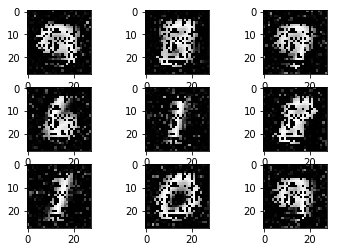

In [116]:
#Autoencoder
for epoch in range(1001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

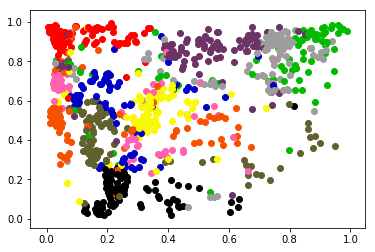

In [117]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0596892
epoch:  5  , loss:  0.0595969
epoch:  10  , loss:  0.0596188
epoch:  15  , loss:  0.0596323
epoch:  20  , loss:  0.0595829
epoch:  25  , loss:  0.0595917
epoch:  30  , loss:  0.0595624
epoch:  35  , loss:  0.0596239
epoch:  40  , loss:  0.0596798
epoch:  45  , loss:  0.0595911
epoch:  50  , loss:  0.0595559
epoch:  55  , loss:  0.0595773
epoch:  60  , loss:  0.059591
epoch:  65  , loss:  0.0596733
epoch:  70  , loss:  0.0599983
epoch:  75  , loss:  0.0596666
epoch:  80  , loss:  0.0596595
epoch:  85  , loss:  0.0596252
epoch:  90  , loss:  0.059573
epoch:  95  , loss:  0.0595382
epoch:  100  , loss:  0.0595424
epoch:  105  , loss:  0.0595611
epoch:  110  , loss:  0.059574
epoch:  115  , loss:  0.0595765
epoch:  120  , loss:  0.0598577
epoch:  125  , loss:  0.0596007
epoch:  130  , loss:  0.0595775
epoch:  135  , loss:  0.0595436
epoch:  140  , loss:  0.0595591
epoch:  145  , loss:  0.0595319
epoch:  150  , loss:  0.0595554
epoch:  155  , loss:  0.0595706
e

epoch:  1285  , loss:  0.0590296
epoch:  1290  , loss:  0.0589723
epoch:  1295  , loss:  0.0589845
epoch:  1300  , loss:  0.0589951
epoch:  1305  , loss:  0.0589869
epoch:  1310  , loss:  0.0590886
epoch:  1315  , loss:  0.0591831
epoch:  1320  , loss:  0.0590186
epoch:  1325  , loss:  0.059045
epoch:  1330  , loss:  0.0589644
epoch:  1335  , loss:  0.0590202
epoch:  1340  , loss:  0.058999
epoch:  1345  , loss:  0.0590195
epoch:  1350  , loss:  0.0589717
epoch:  1355  , loss:  0.0590025
epoch:  1360  , loss:  0.0589919
epoch:  1365  , loss:  0.0590044
epoch:  1370  , loss:  0.0589997
epoch:  1375  , loss:  0.0590691
epoch:  1380  , loss:  0.0591147
epoch:  1385  , loss:  0.0591283
epoch:  1390  , loss:  0.059087
epoch:  1395  , loss:  0.0589642
epoch:  1400  , loss:  0.0589543
epoch:  1405  , loss:  0.0589362
epoch:  1410  , loss:  0.0590133
epoch:  1415  , loss:  0.058987
epoch:  1420  , loss:  0.0589687
epoch:  1425  , loss:  0.0589605
epoch:  1430  , loss:  0.059079
epoch:  1435  ,

epoch:  2535  , loss:  0.0588201
epoch:  2540  , loss:  0.0589367
epoch:  2545  , loss:  0.0589242
epoch:  2550  , loss:  0.0591313
epoch:  2555  , loss:  0.0590147
epoch:  2560  , loss:  0.0588859
epoch:  2565  , loss:  0.0588989
epoch:  2570  , loss:  0.0588686
epoch:  2575  , loss:  0.0588135
epoch:  2580  , loss:  0.0589368
epoch:  2585  , loss:  0.0589592
epoch:  2590  , loss:  0.0589595
epoch:  2595  , loss:  0.0589181
epoch:  2600  , loss:  0.058808
epoch:  2605  , loss:  0.0588015
epoch:  2610  , loss:  0.0587527
epoch:  2615  , loss:  0.0587461
epoch:  2620  , loss:  0.058784
epoch:  2625  , loss:  0.0588492
epoch:  2630  , loss:  0.058787
epoch:  2635  , loss:  0.0587893
epoch:  2640  , loss:  0.0588285
epoch:  2645  , loss:  0.0588013
epoch:  2650  , loss:  0.0587738
epoch:  2655  , loss:  0.0588532
epoch:  2660  , loss:  0.0588072
epoch:  2665  , loss:  0.058879
epoch:  2670  , loss:  0.0588454
epoch:  2675  , loss:  0.0588344
epoch:  2680  , loss:  0.0588691
epoch:  2685  

epoch:  3785  , loss:  0.0586382
epoch:  3790  , loss:  0.0586203
epoch:  3795  , loss:  0.0586201
epoch:  3800  , loss:  0.0586259
epoch:  3805  , loss:  0.0586256
epoch:  3810  , loss:  0.0585984
epoch:  3815  , loss:  0.0585867
epoch:  3820  , loss:  0.0586295
epoch:  3825  , loss:  0.0586315
epoch:  3830  , loss:  0.0586354
epoch:  3835  , loss:  0.058674
epoch:  3840  , loss:  0.058756
epoch:  3845  , loss:  0.0587438
epoch:  3850  , loss:  0.0586336
epoch:  3855  , loss:  0.0586772
epoch:  3860  , loss:  0.0586071
epoch:  3865  , loss:  0.0586186
epoch:  3870  , loss:  0.0587231
epoch:  3875  , loss:  0.0586452
epoch:  3880  , loss:  0.0585944
epoch:  3885  , loss:  0.0585707
epoch:  3890  , loss:  0.0586999
epoch:  3895  , loss:  0.0586399
epoch:  3900  , loss:  0.0586055
epoch:  3905  , loss:  0.0586089
epoch:  3910  , loss:  0.0586119
epoch:  3915  , loss:  0.0585922
epoch:  3920  , loss:  0.0586402
epoch:  3925  , loss:  0.0585953
epoch:  3930  , loss:  0.0586163
epoch:  3935

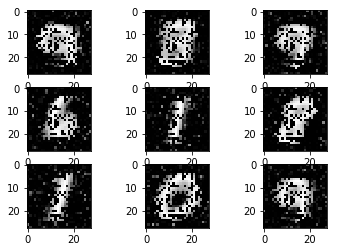

In [118]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%5==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

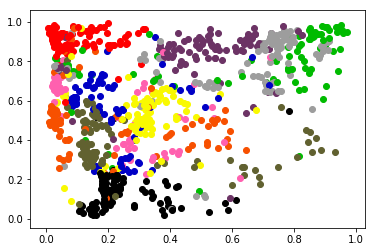

In [119]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0587295
epoch:  100  , loss:  0.0584962
epoch:  200  , loss:  0.0585039
epoch:  300  , loss:  0.0586168
epoch:  400  , loss:  0.0585553
epoch:  500  , loss:  0.0585046
epoch:  600  , loss:  0.0584317
epoch:  700  , loss:  0.0584606
epoch:  800  , loss:  0.0583933
epoch:  900  , loss:  0.0585142
epoch:  1000  , loss:  0.0583877
epoch:  1100  , loss:  0.0586254
epoch:  1200  , loss:  0.0583176
epoch:  1300  , loss:  0.0583722
epoch:  1400  , loss:  0.0583224
epoch:  1500  , loss:  0.0583189
epoch:  1600  , loss:  0.0583363
epoch:  1700  , loss:  0.0578824
epoch:  1800  , loss:  0.0580509
epoch:  1900  , loss:  0.0578461
epoch:  2000  , loss:  0.0578164
epoch:  2100  , loss:  0.0577784
epoch:  2200  , loss:  0.058023
epoch:  2300  , loss:  0.0579986
epoch:  2400  , loss:  0.0576886
epoch:  2500  , loss:  0.0578758
epoch:  2600  , loss:  0.0576543
epoch:  2700  , loss:  0.0576182
epoch:  2800  , loss:  0.0579302
epoch:  2900  , loss:  0.0576434
epoch:  3000  , loss:  

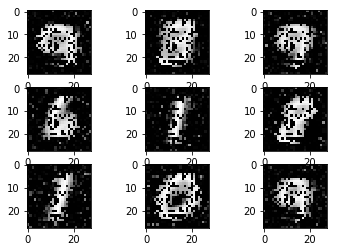

In [120]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

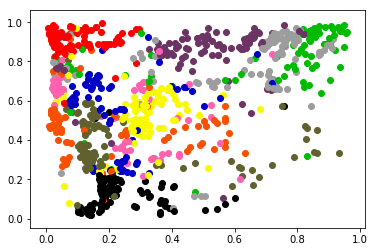

In [121]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0572629
epoch:  100  , loss:  0.0574032
epoch:  200  , loss:  0.0571322
epoch:  300  , loss:  0.0571529
epoch:  400  , loss:  0.0573879
epoch:  500  , loss:  0.0570401
epoch:  600  , loss:  0.0570777
epoch:  700  , loss:  0.0573024
epoch:  800  , loss:  0.0569818
epoch:  900  , loss:  0.0571437
epoch:  1000  , loss:  0.0568133
epoch:  1100  , loss:  0.0570231
epoch:  1200  , loss:  0.0568438
epoch:  1300  , loss:  0.0567749
epoch:  1400  , loss:  0.0568958
epoch:  1500  , loss:  0.0567681
epoch:  1600  , loss:  0.0565651
epoch:  1700  , loss:  0.056684
epoch:  1800  , loss:  0.0564907
epoch:  1900  , loss:  0.0565726
epoch:  2000  , loss:  0.0564021
epoch:  2100  , loss:  0.0566049
epoch:  2200  , loss:  0.0566171
epoch:  2300  , loss:  0.056364
epoch:  2400  , loss:  0.0568014
epoch:  2500  , loss:  0.0562397
epoch:  2600  , loss:  0.0562821
epoch:  2700  , loss:  0.0561497
epoch:  2800  , loss:  0.056182
epoch:  2900  , loss:  0.0561886
epoch:  3000  , loss:  0.

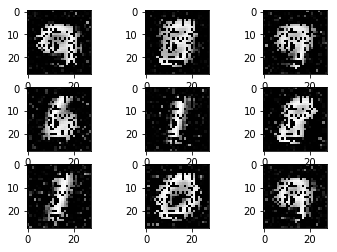

In [122]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

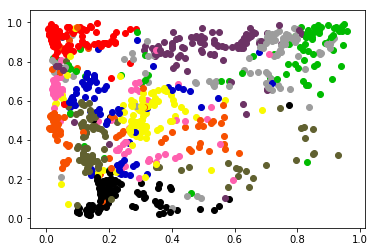

In [123]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0503482
epoch:  100  , loss:  0.0511195
epoch:  200  , loss:  0.0502868
epoch:  300  , loss:  0.0502606
epoch:  400  , loss:  0.0501594
epoch:  500  , loss:  0.0502258
epoch:  600  , loss:  0.0500707
epoch:  700  , loss:  0.0502336
epoch:  800  , loss:  0.0507464
epoch:  900  , loss:  0.0501264
epoch:  1000  , loss:  0.0504156
epoch:  1100  , loss:  0.0501826
epoch:  1200  , loss:  0.0505939
epoch:  1300  , loss:  0.0506265
epoch:  1400  , loss:  0.0500358
epoch:  1500  , loss:  0.050159
epoch:  1600  , loss:  0.0502437
epoch:  1700  , loss:  0.0506902
epoch:  1800  , loss:  0.050008
epoch:  1900  , loss:  0.050048
epoch:  2000  , loss:  0.0502322
epoch:  2100  , loss:  0.0512831
epoch:  2200  , loss:  0.0500236
epoch:  2300  , loss:  0.0500181
epoch:  2400  , loss:  0.0512824
epoch:  2500  , loss:  0.0504806
epoch:  2600  , loss:  0.0501877
epoch:  2700  , loss:  0.0503271
epoch:  2800  , loss:  0.050173
epoch:  2900  , loss:  0.0510163
epoch:  3000  , loss:  0.0

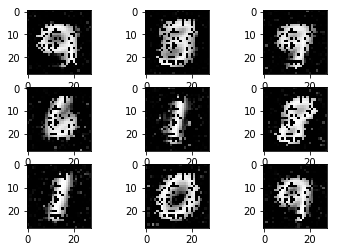

In [141]:
#Autoencoder
for epoch in range(10001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

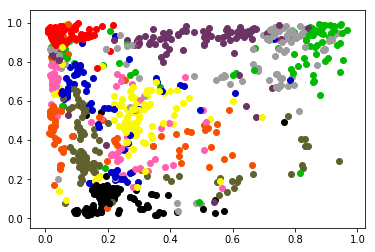

In [142]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0494198
epoch:  100  , loss:  0.0494815
epoch:  200  , loss:  0.0495438
epoch:  300  , loss:  0.0496341
epoch:  400  , loss:  0.0492819
epoch:  500  , loss:  0.0492947
epoch:  600  , loss:  0.0492991
epoch:  700  , loss:  0.049544
epoch:  800  , loss:  0.049772
epoch:  900  , loss:  0.0493134
epoch:  1000  , loss:  0.0505933
epoch:  1100  , loss:  0.0493348
epoch:  1200  , loss:  0.0495539
epoch:  1300  , loss:  0.0492999
epoch:  1400  , loss:  0.0494133
epoch:  1500  , loss:  0.0493421
epoch:  1600  , loss:  0.0494191
epoch:  1700  , loss:  0.0491683
epoch:  1800  , loss:  0.0497596
epoch:  1900  , loss:  0.049374
epoch:  2000  , loss:  0.0512704
epoch:  2100  , loss:  0.0496819
epoch:  2200  , loss:  0.0494767
epoch:  2300  , loss:  0.04935
epoch:  2400  , loss:  0.0492964
epoch:  2500  , loss:  0.0494531
epoch:  2600  , loss:  0.0496616
epoch:  2700  , loss:  0.0493859
epoch:  2800  , loss:  0.0493824
epoch:  2900  , loss:  0.0493579
epoch:  3000  , loss:  0.04

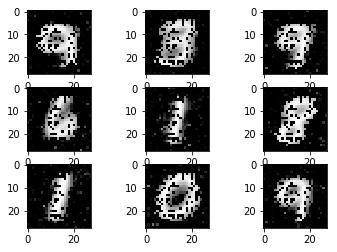

In [143]:
#Autoencoder
for epoch in range(10001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

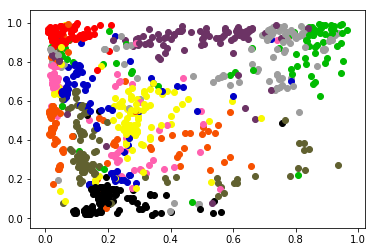

In [144]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0488787
epoch:  100  , loss:  0.0488873
epoch:  200  , loss:  0.0496456
epoch:  300  , loss:  0.0488878
epoch:  400  , loss:  0.0487224
epoch:  500  , loss:  0.0489149
epoch:  600  , loss:  0.0493181
epoch:  700  , loss:  0.0489949
epoch:  800  , loss:  0.0497589
epoch:  900  , loss:  0.0488455
epoch:  1000  , loss:  0.0488644
epoch:  1100  , loss:  0.0486654
epoch:  1200  , loss:  0.0498116
epoch:  1300  , loss:  0.048681
epoch:  1400  , loss:  0.0498824
epoch:  1500  , loss:  0.0486294
epoch:  1600  , loss:  0.0490533
epoch:  1700  , loss:  0.0487402
epoch:  1800  , loss:  0.0488002
epoch:  1900  , loss:  0.0487119
epoch:  2000  , loss:  0.0490367
epoch:  2100  , loss:  0.0488038
epoch:  2200  , loss:  0.0486286
epoch:  2300  , loss:  0.0486929
epoch:  2400  , loss:  0.0490065
epoch:  2500  , loss:  0.0487417
epoch:  2600  , loss:  0.0490117
epoch:  2700  , loss:  0.0491221
epoch:  2800  , loss:  0.0486866
epoch:  2900  , loss:  0.0486209
epoch:  3000  , loss:  

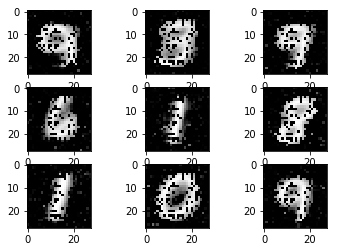

In [145]:
#Autoencoder
for epoch in range(10001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

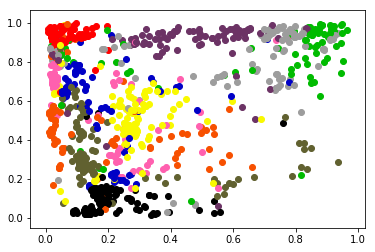

In [146]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0485183
epoch:  100  , loss:  0.0486658
epoch:  200  , loss:  0.048719
epoch:  300  , loss:  0.0488825
epoch:  400  , loss:  0.0485129
epoch:  500  , loss:  0.0488827
epoch:  600  , loss:  0.0499883
epoch:  700  , loss:  0.0482992
epoch:  800  , loss:  0.048493
epoch:  900  , loss:  0.0486247
epoch:  1000  , loss:  0.0494921
epoch:  1100  , loss:  0.0484094
epoch:  1200  , loss:  0.0485776
epoch:  1300  , loss:  0.0484423
epoch:  1400  , loss:  0.0486352
epoch:  1500  , loss:  0.0487639
epoch:  1600  , loss:  0.0494169
epoch:  1700  , loss:  0.0485469
epoch:  1800  , loss:  0.0483834
epoch:  1900  , loss:  0.0487718
epoch:  2000  , loss:  0.0484383
epoch:  2100  , loss:  0.0484262
epoch:  2200  , loss:  0.049056
epoch:  2300  , loss:  0.048584
epoch:  2400  , loss:  0.048611
epoch:  2500  , loss:  0.048577
epoch:  2600  , loss:  0.0484325
epoch:  2700  , loss:  0.0485347
epoch:  2800  , loss:  0.0486903
epoch:  2900  , loss:  0.0485125
epoch:  3000  , loss:  0.048

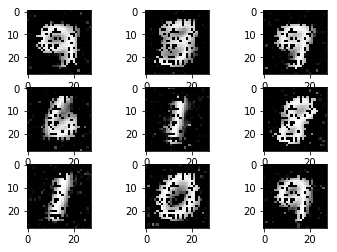

In [147]:
#Autoencoder
for epoch in range(10001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

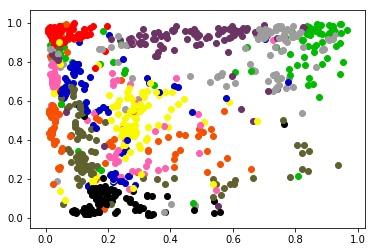

In [148]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.0488821
epoch:  100  , loss:  0.0482649
epoch:  200  , loss:  0.0483724
epoch:  300  , loss:  0.0491709
epoch:  400  , loss:  0.0483537
epoch:  500  , loss:  0.048259
epoch:  600  , loss:  0.0481514
epoch:  700  , loss:  0.0484399
epoch:  800  , loss:  0.0484912
epoch:  900  , loss:  0.0483225
epoch:  1000  , loss:  0.0487412
epoch:  1100  , loss:  0.0481537
epoch:  1200  , loss:  0.0500838
epoch:  1300  , loss:  0.0488868
epoch:  1400  , loss:  0.0482341
epoch:  1500  , loss:  0.0487765
epoch:  1600  , loss:  0.0486077
epoch:  1700  , loss:  0.0488141
epoch:  1800  , loss:  0.0481092
epoch:  1900  , loss:  0.0481428
epoch:  2000  , loss:  0.0482015
epoch:  2100  , loss:  0.0487658
epoch:  2200  , loss:  0.048228
epoch:  2300  , loss:  0.0486389
epoch:  2400  , loss:  0.0489549
epoch:  2500  , loss:  0.0486442
epoch:  2600  , loss:  0.0483557
epoch:  2700  , loss:  0.0485172
epoch:  2800  , loss:  0.0482206
epoch:  2900  , loss:  0.048144
epoch:  3000  , loss:  0.

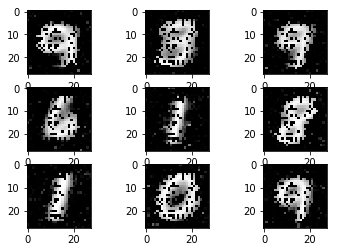

In [149]:
#Autoencoder
for epoch in range(10001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

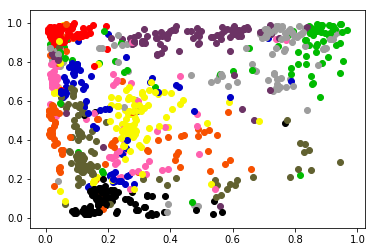

In [150]:
nums_scatter = sess.run(layer9.output(tf.nn.sigmoid), feed_dict={xs:x_train})
yy = np.argmax(y_train, 1)
color = {0:'#000000', 1:'#FF0000', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'#9D9D9D'}
# color = {0:'#000000', 1:'r', 2:'#F75000', 3:'#F9F900', 4:'#00BB00', 5:'#0000C6', 6:'#616130', 7:'#6C3365', 8:'#FF60AF', 9:'9D9D9D'}
for i,j in enumerate(nums_scatter[0:1000]):
    plt.scatter(j[0], j[1], c=color[yy[i]], alpha=1)

epoch:  0  , loss:  0.048274
epoch:  100  , loss:  0.0484516
epoch:  200  , loss:  0.0482039
epoch:  300  , loss:  0.0480471
epoch:  400  , loss:  0.0484281
epoch:  500  , loss:  0.0480276
epoch:  600  , loss:  0.049082
epoch:  700  , loss:  0.0480571
epoch:  800  , loss:  0.0481896
epoch:  900  , loss:  0.0483766
epoch:  1000  , loss:  0.0488548
epoch:  1100  , loss:  0.048284
epoch:  1200  , loss:  0.0489418
epoch:  1300  , loss:  0.0485635
epoch:  1400  , loss:  0.0485714
epoch:  1500  , loss:  0.0486788
epoch:  1600  , loss:  0.0485799
epoch:  1700  , loss:  0.0483423
epoch:  1800  , loss:  0.0489673
epoch:  1900  , loss:  0.0485559
epoch:  2000  , loss:  0.0482137
epoch:  2100  , loss:  0.0481467
epoch:  2200  , loss:  0.0484443
epoch:  2300  , loss:  0.0480894
epoch:  2400  , loss:  0.0484271
epoch:  2500  , loss:  0.049238
epoch:  2600  , loss:  0.0483236
epoch:  2700  , loss:  0.0481865
epoch:  2800  , loss:  0.0484531
epoch:  2900  , loss:  0.0485836
epoch:  3000  , loss:  0.0

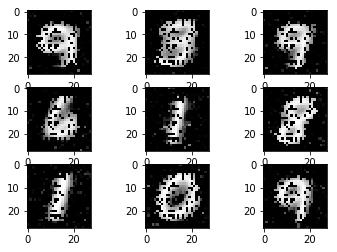

In [151]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0483236
epoch:  100  , loss:  0.0489654
epoch:  200  , loss:  0.0481014
epoch:  300  , loss:  0.0483247
epoch:  400  , loss:  0.0480661
epoch:  500  , loss:  0.0481497
epoch:  600  , loss:  0.0486126
epoch:  700  , loss:  0.0483968
epoch:  800  , loss:  0.0481995
epoch:  900  , loss:  0.0481246
epoch:  1000  , loss:  0.0480816
epoch:  1100  , loss:  0.0486156
epoch:  1200  , loss:  0.048682
epoch:  1300  , loss:  0.0479895
epoch:  1400  , loss:  0.0479936
epoch:  1500  , loss:  0.0487139
epoch:  1600  , loss:  0.0482679
epoch:  1700  , loss:  0.0483662
epoch:  1800  , loss:  0.048349
epoch:  1900  , loss:  0.0480994
epoch:  2000  , loss:  0.0482577
epoch:  2100  , loss:  0.0480447
epoch:  2200  , loss:  0.0481139
epoch:  2300  , loss:  0.0479584
epoch:  2400  , loss:  0.048714
epoch:  2500  , loss:  0.0480812
epoch:  2600  , loss:  0.0487083
epoch:  2700  , loss:  0.0484346
epoch:  2800  , loss:  0.0479462
epoch:  2900  , loss:  0.0481296
epoch:  3000  , loss:  0.

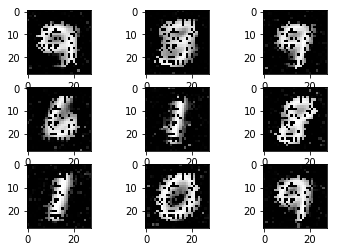

In [152]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0482006
epoch:  100  , loss:  0.0485151
epoch:  200  , loss:  0.0482896
epoch:  300  , loss:  0.0486525
epoch:  400  , loss:  0.0481904
epoch:  500  , loss:  0.0494065
epoch:  600  , loss:  0.047907
epoch:  700  , loss:  0.0482278
epoch:  800  , loss:  0.048436
epoch:  900  , loss:  0.0485565
epoch:  1000  , loss:  0.0481442
epoch:  1100  , loss:  0.0483822
epoch:  1200  , loss:  0.0483558
epoch:  1300  , loss:  0.0480624
epoch:  1400  , loss:  0.0479019
epoch:  1500  , loss:  0.0479359
epoch:  1600  , loss:  0.0481003
epoch:  1700  , loss:  0.0485335
epoch:  1800  , loss:  0.0479013
epoch:  1900  , loss:  0.0480041
epoch:  2000  , loss:  0.0481977
epoch:  2100  , loss:  0.0481499
epoch:  2200  , loss:  0.0482202
epoch:  2300  , loss:  0.0482489
epoch:  2400  , loss:  0.0481546
epoch:  2500  , loss:  0.0499673
epoch:  2600  , loss:  0.0480284
epoch:  2700  , loss:  0.047944
epoch:  2800  , loss:  0.0485555
epoch:  2900  , loss:  0.0480441
epoch:  3000  , loss:  0.

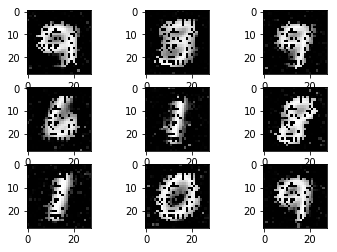

In [153]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0477881
epoch:  100  , loss:  0.0479985
epoch:  200  , loss:  0.047854
epoch:  300  , loss:  0.0489088
epoch:  400  , loss:  0.0480605
epoch:  500  , loss:  0.0484682
epoch:  600  , loss:  0.0482216
epoch:  700  , loss:  0.0478033
epoch:  800  , loss:  0.0478687
epoch:  900  , loss:  0.048199
epoch:  1000  , loss:  0.0479098
epoch:  1100  , loss:  0.0480814
epoch:  1200  , loss:  0.0479423
epoch:  1300  , loss:  0.0483326
epoch:  1400  , loss:  0.0482669
epoch:  1500  , loss:  0.0479444
epoch:  1600  , loss:  0.0476904
epoch:  1700  , loss:  0.0478377
epoch:  1800  , loss:  0.0478662
epoch:  1900  , loss:  0.0483753
epoch:  2000  , loss:  0.0498519
epoch:  2100  , loss:  0.0480974
epoch:  2200  , loss:  0.0478877
epoch:  2300  , loss:  0.0477802
epoch:  2400  , loss:  0.0480682
epoch:  2500  , loss:  0.0480267
epoch:  2600  , loss:  0.048213
epoch:  2700  , loss:  0.0478166
epoch:  2800  , loss:  0.0493621
epoch:  2900  , loss:  0.0479972
epoch:  3000  , loss:  0.

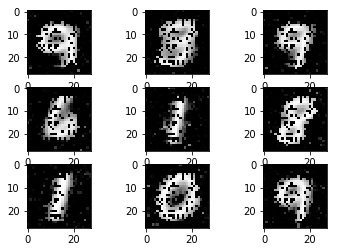

In [154]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0478658
epoch:  100  , loss:  0.048405
epoch:  200  , loss:  0.0488546
epoch:  300  , loss:  0.0480643
epoch:  400  , loss:  0.0478474
epoch:  500  , loss:  0.0479331
epoch:  600  , loss:  0.048322
epoch:  700  , loss:  0.0487376
epoch:  800  , loss:  0.0485344
epoch:  900  , loss:  0.0477553
epoch:  1000  , loss:  0.0480808
epoch:  1100  , loss:  0.0479027
epoch:  1200  , loss:  0.0481563
epoch:  1300  , loss:  0.0476965
epoch:  1400  , loss:  0.047945
epoch:  1500  , loss:  0.0478549
epoch:  1600  , loss:  0.0478046
epoch:  1700  , loss:  0.0479624
epoch:  1800  , loss:  0.0479076
epoch:  1900  , loss:  0.0479827
epoch:  2000  , loss:  0.0482709
epoch:  2100  , loss:  0.0484184
epoch:  2200  , loss:  0.0480606
epoch:  2300  , loss:  0.0478448
epoch:  2400  , loss:  0.0483673
epoch:  2500  , loss:  0.0477415
epoch:  2600  , loss:  0.0477076
epoch:  2700  , loss:  0.0480773
epoch:  2800  , loss:  0.0480175
epoch:  2900  , loss:  0.0478771
epoch:  3000  , loss:  0.

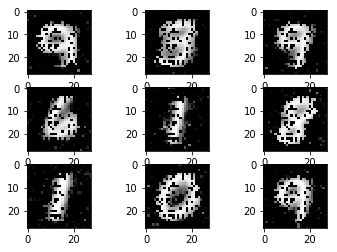

In [155]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0483215
epoch:  100  , loss:  0.0477164
epoch:  200  , loss:  0.0479238
epoch:  300  , loss:  0.0476693
epoch:  400  , loss:  0.0479998
epoch:  500  , loss:  0.0476677
epoch:  600  , loss:  0.0478298
epoch:  700  , loss:  0.0478501
epoch:  800  , loss:  0.0479017
epoch:  900  , loss:  0.0482174
epoch:  1000  , loss:  0.0484302
epoch:  1100  , loss:  0.0479528
epoch:  1200  , loss:  0.0479008
epoch:  1300  , loss:  0.0479512
epoch:  1400  , loss:  0.0480151
epoch:  1500  , loss:  0.0477216
epoch:  1600  , loss:  0.047897
epoch:  1700  , loss:  0.048818
epoch:  1800  , loss:  0.048142
epoch:  1900  , loss:  0.047591
epoch:  2000  , loss:  0.0484114
epoch:  2100  , loss:  0.0478961
epoch:  2200  , loss:  0.0484039
epoch:  2300  , loss:  0.0477146
epoch:  2400  , loss:  0.0482389
epoch:  2500  , loss:  0.0482058
epoch:  2600  , loss:  0.0478864
epoch:  2700  , loss:  0.0485258
epoch:  2800  , loss:  0.047703
epoch:  2900  , loss:  0.0477642
epoch:  3000  , loss:  0.04

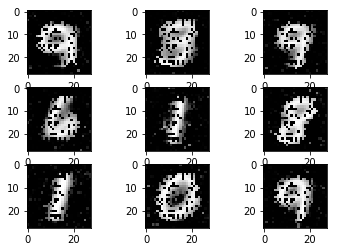

In [156]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0477334
epoch:  100  , loss:  0.0479534
epoch:  200  , loss:  0.0477555
epoch:  300  , loss:  0.0483658
epoch:  400  , loss:  0.0481393
epoch:  500  , loss:  0.0481139
epoch:  600  , loss:  0.0478172
epoch:  700  , loss:  0.0478862
epoch:  800  , loss:  0.0497598
epoch:  900  , loss:  0.0479433
epoch:  1000  , loss:  0.0481199
epoch:  1100  , loss:  0.0480571
epoch:  1200  , loss:  0.0481087
epoch:  1300  , loss:  0.0479592
epoch:  1400  , loss:  0.0476749
epoch:  1500  , loss:  0.0478594
epoch:  1600  , loss:  0.0481301
epoch:  1700  , loss:  0.0479502
epoch:  1800  , loss:  0.0480191
epoch:  1900  , loss:  0.0478922
epoch:  2000  , loss:  0.0481668
epoch:  2100  , loss:  0.0481591
epoch:  2200  , loss:  0.0478708
epoch:  2300  , loss:  0.0481344
epoch:  2400  , loss:  0.0479757
epoch:  2500  , loss:  0.0478548
epoch:  2600  , loss:  0.0481674
epoch:  2700  , loss:  0.0480197
epoch:  2800  , loss:  0.0478783
epoch:  2900  , loss:  0.0480341
epoch:  3000  , loss: 

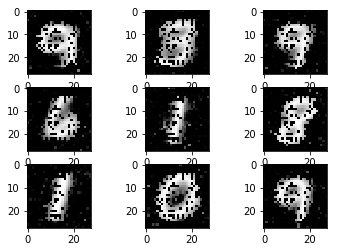

In [157]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0481557
epoch:  100  , loss:  0.0477263
epoch:  200  , loss:  0.0481018
epoch:  300  , loss:  0.0480217
epoch:  400  , loss:  0.0478459
epoch:  500  , loss:  0.0480323
epoch:  600  , loss:  0.0487224
epoch:  700  , loss:  0.0477339
epoch:  800  , loss:  0.0489999
epoch:  900  , loss:  0.0478369
epoch:  1000  , loss:  0.0477956
epoch:  1100  , loss:  0.0476889
epoch:  1200  , loss:  0.0479569
epoch:  1300  , loss:  0.0476166
epoch:  1400  , loss:  0.047813
epoch:  1500  , loss:  0.0484639
epoch:  1600  , loss:  0.0479255
epoch:  1700  , loss:  0.0478233
epoch:  1800  , loss:  0.0477976
epoch:  1900  , loss:  0.0486551
epoch:  2000  , loss:  0.0481908
epoch:  2100  , loss:  0.0476984
epoch:  2200  , loss:  0.0477501
epoch:  2300  , loss:  0.048115
epoch:  2400  , loss:  0.0478624
epoch:  2500  , loss:  0.0477977
epoch:  2600  , loss:  0.0478097
epoch:  2700  , loss:  0.0478079
epoch:  2800  , loss:  0.048628
epoch:  2900  , loss:  0.0476191
epoch:  3000  , loss:  0.

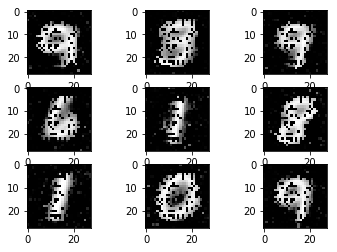

In [158]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0483552
epoch:  100  , loss:  0.0477478
epoch:  200  , loss:  0.0478997
epoch:  300  , loss:  0.0501747
epoch:  400  , loss:  0.0477634
epoch:  500  , loss:  0.0477218
epoch:  600  , loss:  0.0478977
epoch:  700  , loss:  0.0482879
epoch:  800  , loss:  0.0480553
epoch:  900  , loss:  0.0482031
epoch:  1000  , loss:  0.0478168
epoch:  1100  , loss:  0.047646
epoch:  1200  , loss:  0.0478631
epoch:  1300  , loss:  0.0479581
epoch:  1400  , loss:  0.0481999
epoch:  1500  , loss:  0.0476671
epoch:  1600  , loss:  0.0477128
epoch:  1700  , loss:  0.0482791
epoch:  1800  , loss:  0.0480957
epoch:  1900  , loss:  0.0476665
epoch:  2000  , loss:  0.0475479
epoch:  2100  , loss:  0.0477041
epoch:  2200  , loss:  0.0480353
epoch:  2300  , loss:  0.047879
epoch:  2400  , loss:  0.0477225
epoch:  2500  , loss:  0.0479272
epoch:  2600  , loss:  0.0478719
epoch:  2700  , loss:  0.04768
epoch:  2800  , loss:  0.0478114
epoch:  2900  , loss:  0.0478673
epoch:  3000  , loss:  0.0

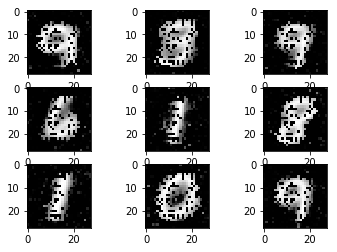

In [159]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0481921
epoch:  100  , loss:  0.0483074
epoch:  200  , loss:  0.0477726
epoch:  300  , loss:  0.0479484
epoch:  400  , loss:  0.0477108
epoch:  500  , loss:  0.0476287
epoch:  600  , loss:  0.0480909
epoch:  700  , loss:  0.0484888
epoch:  800  , loss:  0.0477061
epoch:  900  , loss:  0.0476376
epoch:  1000  , loss:  0.0480362
epoch:  1100  , loss:  0.0475732
epoch:  1200  , loss:  0.0485888
epoch:  1300  , loss:  0.0475617
epoch:  1400  , loss:  0.0477748
epoch:  1500  , loss:  0.048106
epoch:  1600  , loss:  0.0479089
epoch:  1700  , loss:  0.0477411
epoch:  1800  , loss:  0.0479072
epoch:  1900  , loss:  0.0478102
epoch:  2000  , loss:  0.0477386
epoch:  2100  , loss:  0.0477388
epoch:  2200  , loss:  0.0477757
epoch:  2300  , loss:  0.0477172
epoch:  2400  , loss:  0.0479619
epoch:  2500  , loss:  0.0476739
epoch:  2600  , loss:  0.0477565
epoch:  2700  , loss:  0.0482769
epoch:  2800  , loss:  0.0475786
epoch:  2900  , loss:  0.0476001
epoch:  3000  , loss:  

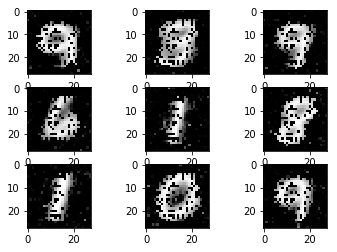

In [160]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0479524
epoch:  100  , loss:  0.047683
epoch:  200  , loss:  0.0479207
epoch:  300  , loss:  0.0481583
epoch:  400  , loss:  0.0477827
epoch:  500  , loss:  0.0481239
epoch:  600  , loss:  0.0477351
epoch:  700  , loss:  0.0476633
epoch:  800  , loss:  0.0476876
epoch:  900  , loss:  0.0476115
epoch:  1000  , loss:  0.0477037
epoch:  1100  , loss:  0.0476472
epoch:  1200  , loss:  0.0476076
epoch:  1300  , loss:  0.0484642
epoch:  1400  , loss:  0.0475457
epoch:  1500  , loss:  0.0475335
epoch:  1600  , loss:  0.0477218
epoch:  1700  , loss:  0.0480677
epoch:  1800  , loss:  0.0481252
epoch:  1900  , loss:  0.0477765
epoch:  2000  , loss:  0.0476585
epoch:  2100  , loss:  0.048849
epoch:  2200  , loss:  0.0476579
epoch:  2300  , loss:  0.0482401
epoch:  2400  , loss:  0.0477441
epoch:  2500  , loss:  0.0479383
epoch:  2600  , loss:  0.0478156
epoch:  2700  , loss:  0.0482261
epoch:  2800  , loss:  0.0476293
epoch:  2900  , loss:  0.0477689
epoch:  3000  , loss:  0

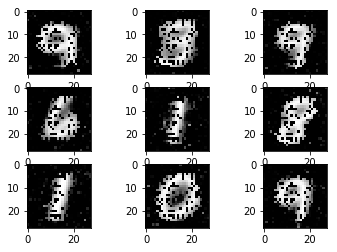

In [161]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')

epoch:  0  , loss:  0.0477514
epoch:  100  , loss:  0.0479359
epoch:  200  , loss:  0.0479473
epoch:  300  , loss:  0.0478301
epoch:  400  , loss:  0.0478216
epoch:  500  , loss:  0.0478717
epoch:  600  , loss:  0.0483033
epoch:  700  , loss:  0.0478685
epoch:  800  , loss:  0.0474627
epoch:  900  , loss:  0.047561
epoch:  1000  , loss:  0.0480395
epoch:  1100  , loss:  0.0478894
epoch:  1200  , loss:  0.0476787
epoch:  1300  , loss:  0.0478238
epoch:  1400  , loss:  0.0476066
epoch:  1500  , loss:  0.0489156
epoch:  1600  , loss:  0.0486815
epoch:  1700  , loss:  0.0475912
epoch:  1800  , loss:  0.0475541
epoch:  1900  , loss:  0.0476071
epoch:  2000  , loss:  0.0481421
epoch:  2100  , loss:  0.048557
epoch:  2200  , loss:  0.0480175
epoch:  2300  , loss:  0.0474253
epoch:  2400  , loss:  0.0476381
epoch:  2500  , loss:  0.0479501
epoch:  2600  , loss:  0.0479409
epoch:  2700  , loss:  0.0478497
epoch:  2800  , loss:  0.047724
epoch:  2900  , loss:  0.0477442
epoch:  3000  , loss:  0.

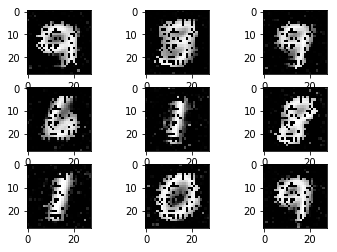

In [162]:
#Autoencoder
for epoch in range(5001):    
#     np.random.shuffle(index)
    for batch in range(batches):
        sess.run(train_step_ae, feed_dict={xs: x_train[[index[batch_size*batch:batch_size*(batch+1)]]]})
#     sess.run(train_step, feed_dict={xs: x_train[0:100], ys: y_train[0:100]})
    
    if epoch%100==0:
        print "epoch: ",epoch," , loss: ",sess.run(loss_ae, feed_dict={xs: x_train})
#         print sess.run(tf.argmax(sess.run(layer1, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(prediction, feed_dict={xs: x_train})[0:50],1))
#         print sess.run(tf.argmax(sess.run(output2, feed_dict={xs: x_train})[0:50],1))
    
layer18_outputs = sess.run(layer18.output(tf.nn.sigmoid), feed_dict={xs:x_train})
# layer10_outputs = sess.run(layer10.output(tf.nn.relu), feed_dict={xs:x_train})
x_ae = np.array([np.reshape(m,(28,28)) for m in layer18_outputs])
print layer18_outputs[0:4]
fig, ax = plt.subplots(nrows=3, ncols=3)
for i,row in enumerate(ax):
    for j,col in enumerate(row):
        ax[i][j].imshow(x_ae[i*3+j], cmap='gray')